# COVID-19 Analysis and Forecast

With almost entire world coming to standstill and most of the folks are either working from home (WFH) or some of them have lost their jobs the world economy is under free fall.Outbreak of COVID-19 novel coronavirus SARS-CoV-2 has played the havoc in our beautiful planet right now. Since in India we are also currently going through the lock down period, so I decided to understand the COVID-19 data (which is available in https://www.kaggle.com/c/covid19-global-forecasting-week-2/overview), and do some analysis on:
* Worst hit countries currently in the planet (interactively), in terms of COVID-19 confirmed cases and death cases.
* Latest updates from top N countries in the world in terms of Confirmed, Recovered, Death and Active cases.
* Global Spread in the planet currently, and interactively visualizing the data.
* Attempt to analyze the confirmed COVID-19 patients from world and specific countries like China(from where the pandemic started), Iran, Italy, Spain (Massive problem they have faced/facing), United States of America, India,UK, France and Germany.
* Polynomial regression is used to model the data with fairly good r-square numbers.
* Curve fitting is used on the confirmed COVID-19 cases to forecast the data.
* Different graphics libraries are used to plot the data, Plotly is used to Visualize the affected countries in interactive way.
* Folium map is used to show the spread of COVID-19 virus worldwide, which clearly depicts the dangerous time we are living in.

In [ ]:
#ignore the warnings
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
import datetime
import matplotlib.ticker as tick
from random import randint
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import csv
import pylab
import mpld3
from ipywidgets import interact
from matplotlib.ticker import EngFormatter
# you will need to pip install Basemap - https://matplotlib.org/basemap/users/installing.html
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import folium
#Plotting the charts with plotly as well
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import tools
import plotly.express as px
# Set notebook mode to work in offline
py.init_notebook_mode()

#Using enums for various choices
import enum

## Lets Read/Understand the data essentially - Confirmed COVID-19, Recovered COVID-19, Fatalities COVID-19 cases and Country wise COVID-19 data.

In [ ]:
cov19_confirmed_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
cov19_deaths_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')
cov19_recoveries_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')
cov19_country_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')


## Understand the data - Confirmed cases, Recovered cases and Fatalities

### Confirmed cases : 

In [ ]:
cov19_confirmed_data.head(10)

### The structure of cov19_confirmed_data, cov19_deaths_data, cov19_recoveries_data is same and they store the confirmed, recovered and death cases in each country’s province/state respectively. Countries are in alphabetical order.

In [ ]:
#lets see the shape of cov19_confirmed_data data frame
cov19_confirmed_data.shape

In [ ]:
# lets explore the data types of the confirmed covid-19 data frame as well
cov19_confirmed_data.dtypes

In [ ]:
# Lets rename and clean the data frame
cov19_country_data.columns = map(str.lower, cov19_country_data.columns)
cov19_confirmed_data.columns = map(str.lower, cov19_confirmed_data.columns)
cov19_deaths_data.columns = map(str.lower, cov19_deaths_data.columns)
cov19_recoveries_data.columns = map(str.lower, cov19_recoveries_data.columns)

# changing province/state to state and country/region to country
cov19_confirmed_data = cov19_confirmed_data.rename(columns={'province/state': 'state', 'country/region': 'country'})
cov19_recoveries_data = cov19_recoveries_data.rename(columns={'province/state': 'state', 'country/region': 'country'})
cov19_deaths_data = cov19_deaths_data.rename(columns={'province/state': 'state', 'country/region': 'country'})
cov19_country_data = cov19_country_data.rename(columns={'country_region': 'country'})

#define some enums, especially in this case exploring plotly and matplotlib
class ChartPlotter(enum.Enum):
    MatPlotLib = 1
    Plotly = 2
    

## Visualizing the worst hit countries

In [ ]:
sorted_cov19_country_data = cov19_country_data.sort_values('confirmed', ascending= False)
sorted_cov19_country_data

In [ ]:
# lets show the data of 30 countries
n = 30
onlyLimitedData_df = sorted_cov19_country_data.head(n)

fig = go.Figure(data=[go.Table(
    header = dict(
    values = list(onlyLimitedData_df.columns),
    line_color='whitesmoke',
    fill_color='royalblue',
    align=['left','center'],
    font=dict(color='white', size=13),
    height=30
  ),
  cells=dict(
    values=[onlyLimitedData_df.country,
            onlyLimitedData_df.last_update,
            onlyLimitedData_df.people_tested,
            onlyLimitedData_df.people_hospitalized,
            onlyLimitedData_df.lat,
            onlyLimitedData_df.long_,
            onlyLimitedData_df.confirmed,
            onlyLimitedData_df.deaths,
            onlyLimitedData_df.recovered,
            onlyLimitedData_df.active,
            onlyLimitedData_df.incident_rate,
            onlyLimitedData_df.mortality_rate,
            onlyLimitedData_df.uid,
            onlyLimitedData_df.iso3],
      line_color='whitesmoke',
      fill=dict(color=['royalblue', 'black','black','black','orange','red','green','grey','grey','grey','grey','grey','grey','grey']),
      align=['left', 'center'],
      font=dict(color='white', size=13),
      height=15)
    )
])
fig.show()

## Lets use Plotly to Visualize the data

In [ ]:
def plot_bubble_chart(n):
    fig = px.scatter(sorted_cov19_country_data.head(n), x="country", y="confirmed", size="confirmed", 
                     color="country",template="plotly_dark",
                     hover_name="country", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries - in terms of confirmed cases",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    )
    fig.show()

interact(plot_bubble_chart, n=30)

In [ ]:
# Lets use the bar chart as well to plot the countries worst hit, in terms of fatalities
px.bar(
    sorted_cov19_country_data.head(30),
    x = "country",
    y = "deaths",
    title= "Top 30 worst affected countries- in terms of deaths", # the axis names
    color_discrete_sequence=["pink"], 
    template="plotly_dark",
    height=500,
    width=1000
)

## Global Spread on World Map - COVID19

In [ ]:
# # creating world map using Map class
# world_map = folium.Map(location=[11,0], tiles="Stamen Toner", zoom_start=2, max_zoom = 6, min_zoom = 2)
# # iterate over all the rows of confirmed_df to get the lat/long
# for i in range(0,len(cov19_confirmed_data)):
#     folium.Circle(
#         location=[cov19_confirmed_data.iloc[i]['lat'], cov19_confirmed_data.iloc[i]['long']],
#         fill=True,
#         radius=(int((np.log(cov19_confirmed_data.iloc[i,-1]+1.00001)))+0.2)*50000,
#         color='red',
#         fill_color='lightpink',
#     ).add_to(world_map)
    
# world_map

### Fatalities cases : 

In [ ]:
cov19_deaths_data.head(10)

In [ ]:
#lets see the shape of cov19_deaths_data data frame
cov19_deaths_data.shape

In [ ]:
# lets explore the data types of the deaths covid-19 data frame as well
cov19_deaths_data.dtypes

### Recovered cases : 

In [ ]:
cov19_recoveries_data.head(10)

In [ ]:
#lets see the shape of cov19_recoveries_data data frame
cov19_recoveries_data.shape

In [ ]:
# lets explore the data types of the deaths covid-19 data frame as well
cov19_recoveries_data.dtypes

# Some proactive calculations to make the data analysis easy in later stages - Specially in Plotting the data

In [ ]:
# Calculate total number of columns in COVID-19 confirmed data set
no_of_confirmed_data_columns = cov19_confirmed_data.keys()

# Make the subset of cov19_confirmed_data dataframe so that the resulting data frame only includes the dates column
confirmed_data_only_dates_column = cov19_confirmed_data.loc[:, no_of_confirmed_data_columns[4]:no_of_confirmed_data_columns[-1]]

# Make the subset of cov19_deaths_data dataframe so that the resulting data frame only includes the dates column
deaths_data_only_dates_column = cov19_deaths_data.loc[:, no_of_confirmed_data_columns[4]:no_of_confirmed_data_columns[-1]]

# Make the subset of cov19_recoveries_data dataframe so that the resulting data frame only includes the dates column
recovery_data_only_dates_column = cov19_recoveries_data.loc[:, no_of_confirmed_data_columns[4]:no_of_confirmed_data_columns[-1]]

In [ ]:
#Lets have look at confirmed_data_only_dates_column dataframe
confirmed_data_only_dates_column.head()

<div class="identifier">
<font color='blue'>
<b>Inference from above:</b>
<ul>
    <li>The data frames confirmed_data_only_dates_column, deaths_data_only_dates_column, recovery_data_only_dates_column has been sliced so that columns only holds the data from 22 Jan 2020, which will be used to plot the x-y data taking time as x-axis.</li>
</ul>
</font>
</div>

### Case Study :  In this case study and analysis, Since the COVID-19 spread started from China (Wuhan) and later on it hit badly to countries like Iran, Italy, Spain, United States etc. In this case study I am doing the analytics/forecast ***based*** on:
* World
* China
* Iran
* Italy
* Spain
* United States of America
* India
* Germany
* UK
* France

In [ ]:
# Lets prepare the data which will later be used for analysis on whole world and the some specific countries mentioned above.

dates = confirmed_data_only_dates_column.keys()

#Confirmed Data : Initialize()
world_confirmed_data = []
china_confirmed_data = []
iran_confirmed_data = []
italy_confirmed_data = []
spain_confirmed_data = []
united_states_confirmed_data = []
india_confirmed_data = []
germany_confirmed_data = []
uk_confirmed_data = []
france_confirmed_data = []

# Mortality data : Initialize()
total_number_of_fatalities = []
fatality_rate = []
world_mortality_data = []
china_mortality_data = []
iran_mortality_data = []
italy_mortality_data = []
spain_mortality_data = []
united_states_mortality_data = []
india_mortality_data = []
germany_mortality_data = []
uk_mortality_data = []
france_mortality_data = []
for i in dates:
    # Confirmed cases
    confirmed_sum = confirmed_data_only_dates_column[i].sum()
    world_confirmed_data.append(confirmed_sum)
    china_confirmed_data.append(cov19_confirmed_data[cov19_confirmed_data['country']=='China'][i].sum())
    iran_confirmed_data.append(cov19_confirmed_data[cov19_confirmed_data['country']=='Iran'][i].sum())
    italy_confirmed_data.append(cov19_confirmed_data[cov19_confirmed_data['country']=='Italy'][i].sum())
    spain_confirmed_data.append(cov19_confirmed_data[cov19_confirmed_data['country']=='Spain'][i].sum())
    united_states_confirmed_data.append(cov19_confirmed_data[cov19_confirmed_data['country']=='US'][i].sum())
    india_confirmed_data.append(cov19_confirmed_data[cov19_confirmed_data['country']=='India'][i].sum())
    germany_confirmed_data.append(cov19_confirmed_data[cov19_confirmed_data['country']=='Germany'][i].sum())
    uk_confirmed_data.append(cov19_confirmed_data[cov19_confirmed_data['country']=='United Kingdom'][i].sum())
    france_confirmed_data.append(cov19_confirmed_data[cov19_confirmed_data['country']=='France'][i].sum())
    
    # fatality Data
    sum_of_fatalities = deaths_data_only_dates_column[i].sum()
    total_number_of_fatalities.append(sum_of_fatalities)
    fatality_rate.append(total_number_of_fatalities/confirmed_sum)
    world_mortality_data.append(sum_of_fatalities)
    china_mortality_data.append(cov19_deaths_data[cov19_deaths_data['country']=='China'][i].sum())
    iran_mortality_data.append(cov19_deaths_data[cov19_deaths_data['country']=='Iran'][i].sum())
    italy_mortality_data.append(cov19_deaths_data[cov19_deaths_data['country']=='Italy'][i].sum())
    spain_mortality_data.append(cov19_deaths_data[cov19_deaths_data['country']=='Spain'][i].sum())
    united_states_mortality_data.append(cov19_deaths_data[cov19_deaths_data['country']=='US'][i].sum())
    india_mortality_data.append(cov19_deaths_data[cov19_deaths_data['country']=='India'][i].sum())
    germany_mortality_data.append(cov19_deaths_data[cov19_deaths_data['country']=='Germany'][i].sum())
    uk_mortality_data.append(cov19_deaths_data[cov19_deaths_data['country']=='United Kingdom'][i].sum())
    france_mortality_data.append(cov19_deaths_data[cov19_deaths_data['country']=='France'][i].sum())

In [ ]:
# Lets make some dates for simplicity in future
days_to_consider_for_future = 10
modified_list_future = np.array([i for i in range(len(dates)+days_to_consider_for_future)]).reshape(-1, 1)
modified_dates = modified_list_future[:-10]
modified_dates = modified_dates.reshape(1, -1)[0]

<div class="identifier">
<font color='blue'>
<b>Generic User Defined Functions</b>
<ul>
    <li>**plot_confirmed_cases_data** : Plots the data for the confirmed cases against the days elapsed since 22 Jan 2020.</li>
    <li>**plot_daily_increase_confirmed_cases_data** : Plots the data for the daily increase in confirmed cases against the days elapsed since 22 Jan 2020.</li>
    <li>**confirmed_cases_daily_increase** : Prepares the data structures for the whole world and specific countries mentioned above for the daily increase in COVID-19 confirmed cases.</li>
    <li>**polynomial_model_confirmed_Cases** : Fits the polynomial model on confirmed data and predicts the model.</li>
    <li>**plot_forecast_basedon_confirmed_cases_data** : Plot future forecast on Confirmed data of COVID-19 patients.</li>
    <li>**export_to_csv** : Export the country specific data to .csv file.</li>
    <li>**plot_mortality_cases_data** : Plots the data for the fatality cases against the days elapsed since 22 Jan 2020.</li>
</ul>
</font>
</div>

## Data Preparation for future forecast - based on confirmed COVID-19 patients

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
days_to_consider_for_future = 20
future_forcast = np.array([i for i in range(len(dates)+days_to_consider_for_future)]).reshape(-1, 1)
total_number_of_fatalities = np.array(total_number_of_fatalities).reshape(-1, 1)
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    
# our plots are all having dark background
plt.style.use('dark_background')
# also lets increase the width of line plots
mp.rcParams['lines.linewidth'] = 3

## UDF Definitions:

In [ ]:
def format_y_axis(tick_val, pos):
    convert_val = tick_val.astype(np.int64)
    if convert_val > 1000000:
        val = int(convert_val)//1000000
        return '{:d} M'.format(val)
    elif convert_val > 1000:
        val = int(convert_val) // 1000
        return '{:d} k'.format(val)
    else:
        return convert_val

In [ ]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [ ]:
def plot_confirmed_cases_data(countryConfirmedDataList,countryNamesList, chartPlotter):
    numRows = len(countryConfirmedDataList)
    colors = []
    for i in range(numRows):
        colors.append('#%06X' % randint(5, 0xFFFFFF))
        
    if(chartPlotter == ChartPlotter.Plotly):
        fig = make_subplots(rows=numRows, cols=1,subplot_titles = countryNamesList)
        for j in range(numRows):
            modified_color = lighten_color(colors[j],1.0)
            title = "{}".format(countryNamesList[j])
            fig.add_trace(go.Scatter(x=modified_dates,
                                     y=countryConfirmedDataList[j],
                                     fillcolor = colors[j],
                                     name='',
                                     showlegend=False),row=j+1, col=1)
            fig.update_xaxes(title_text="Days since 1/22/2020",row=j+1, col=1)
            fig.update_yaxes(title_text="Confirmed Cases",row=j+1, col=1)
            fig.update_layout(template="plotly_dark",height=1500, width=800, title_text="",font=dict(
                family="Courier New, monospace",
                size=10
            ))
        fig.show()
    else:
        fig, axs = plt.subplots(numRows,figsize=(8,22))
        fig.subplots_adjust(hspace = 1.0)
        plot=0
        for j in range(numRows):
            modified_color = lighten_color(colors[j],1.0)
            axs[plot].plot(modified_dates, countryConfirmedDataList[j],color = modified_color)
            formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")
            axs[plot].yaxis.set_major_formatter(formatter1)
            title = "{}".format(countryNamesList[j])
            axs[plot].set_title(title)
            axs[plot].grid()
            plot=plot+1
            
        for ax in axs.flat:
            ax.set(xlabel='Days since 1/22/2020', ylabel='Confirmed Cases')
            
        # Hide x labels and tick labels for top plots and y ticks for right plots.
        #for ax in axs.flat:
        #    ax.label_outer()
        plt.tight_layout()
        plt.show()
        

In [ ]:
def plot_daily_increase_confirmed_cases_data(countryConfirmedDataList,countryNamesList):
    numRows = len(countryConfirmedDataList)
    colors = []
    
    for i in range(numRows):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    
    fig, axs = plt.subplots(numRows, figsize=(8,22))
    fig.subplots_adjust(hspace = 1.0)
    plot=0
    for j in range(numRows): 
        axs[plot].bar(modified_dates,countryConfirmedDataList[j],color=colors[j])
        formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")
        axs[plot].yaxis.set_major_formatter(formatter1)
        title = "{}".format(countryNamesList[j])
        axs[plot].set_title(title)
        plot=plot+1

    for ax in axs.flat:
        ax.set(xlabel='Days since 1/22/2020', ylabel='Confirmed Cases')
        
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    #for ax in axs.flat:
    #    ax.label_outer()
        
    plt.tight_layout()
    plt.show()

In [ ]:
def confirmed_cases_daily_increase(confirmedCasesData):
    arr = [] 
    for i in range(len(confirmedCasesData)):
        if i == 0:
            arr.append(confirmedCasesData[0])
        else:
            arr.append(confirmedCasesData[i]-confirmedCasesData[i-1])
    return arr 

world_daily_increase_data = confirmed_cases_daily_increase(world_confirmed_data)
china_daily_increase_data = confirmed_cases_daily_increase(china_confirmed_data)
iran_daily_increase_data = confirmed_cases_daily_increase(iran_confirmed_data)
italy_daily_increase_data = confirmed_cases_daily_increase(italy_confirmed_data)
spain_daily_increase_data = confirmed_cases_daily_increase(spain_confirmed_data)
united_states_daily_increase_data = confirmed_cases_daily_increase(united_states_confirmed_data)
india_daily_increase_data = confirmed_cases_daily_increase(india_confirmed_data)
germany_daily_increase_data = confirmed_cases_daily_increase(germany_confirmed_data)
uk_daily_increase_data = confirmed_cases_daily_increase(uk_confirmed_data)
france_daily_increase_data = confirmed_cases_daily_increase(france_confirmed_data)

In [ ]:
def plot_forecast_basedon_confirmed_cases_data(countryConfirmedDataList,countryName,linear_pred):
    plt.figure(figsize=(9, 6))
    plt.plot(modified_dates, countryConfirmedDataList,color = 'blue')
    plt.plot(future_forcast, linear_pred , linestyle='dashed', color='red')
    title = "# of Coronavirus Cases Over Time:  {}".format(countryName)
    plt.title(title, size=15)
    plt.xlabel('Days Since 1/22/2020', size=10)
    plt.ylabel('')
    plt.legend(['Confirmed Cases', 'Polynomial predictions'], prop={'size': 8})
    formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")
    #plt.yaxis.set_major_formatter(formatter1)
    plt.xticks(size=9)
    plt.yticks(size=9)
    plt.grid()
    plt.show()

In [ ]:
def polynomial_model_confirmed_Cases(countryConfirmedDataList,countryName, polyDegree):
    X_train, X_test, y_train, y_test = train_test_split(days_since_1_22, countryConfirmedDataList, test_size=0.05, shuffle=False)
    poly = PolynomialFeatures(degree=polyDegree)
    poly_X_train = poly.fit_transform(X_train)
    poly_X_test = poly.fit_transform(X_test)
    poly_future_forcast = poly.fit_transform(future_forcast)
    linear_model = LinearRegression(normalize=True, fit_intercept=False)
    linear_model.fit(poly_X_train, y_train)
    test_linear_pred = linear_model.predict(poly_X_test)
    linear_pred = linear_model.predict(poly_future_forcast)
    plot_forecast_basedon_confirmed_cases_data(countryConfirmedDataList,countryName,linear_pred)
    print('Mean Absolute Error:', mean_absolute_error(test_linear_pred, y_test))
    print('Mean Squared Error:',mean_squared_error(test_linear_pred, y_test))
    print(linear_model.coef_)

In [ ]:
def export_to_csv(countryName, dataList):
    fileName = countryName + '.csv'
    with open(fileName, 'w') as f:
        writer = csv.writer(f)
        writer.writerows(zip(modified_dates, dataList))

In [ ]:
def plot_mortality_cases_data(countryFatalitiesDataList,countryNamesList):
    numRows = len(countryFatalitiesDataList)
    #mpld3.enable_notebook()
    colors = []
    for i in range(numRows):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    
    fig, axs = plt.subplots(numRows, figsize=(8,22))
    fig.subplots_adjust(hspace = 1.0)
    plot=0    
    for j in range(numRows): 
        #myPlot = axs[plot].plot(modified_dates, countryFatalitiesDataList[j],color = colors[j])
        axs[plot].plot(modified_dates, countryFatalitiesDataList[j],color = colors[j])
        formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")
        axs[plot].yaxis.set_major_formatter(formatter1)
        #labels0 = ['point {0}'.format(i + 1) for i in range(len(countryFatalitiesDataList[j]))]
        #tooltip = mpld3.plugins.PointLabelTooltip(myPlot, labels = labels0)
        #mpld3.plugins.connect(fig, tooltip)
        #axs[plot].grid(color='green', linestyle='solid')
        title = "{}".format(countryNamesList[j])
        axs[plot].set_title(title)
        axs[plot].grid()
        plot=plot+1

    for ax in axs.flat:
        ax.set(xlabel='Days since 1/22/2020', ylabel='Fatal Cases')
        
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    #for ax in axs.flat:
    #    ax.label_outer()
        
    plt.tight_layout()
    plt.show()

## Analysis: COVID-19 Confirmed Cases

<div class="identifier">
<font color='blue'>
<b>World and specific Countries</b>
<ul>
    <li>Plot the data for whole world and some specific countries.</li>
    <li>x-axis represents days elapsed since January 22, 2020.</li>
    <li>y-axis represents confirmed COVID-19 cases respectively.</li>
</ul>
</font>
</div>

In [ ]:
all_list = []
all_list.append(world_confirmed_data)
all_list.append(china_confirmed_data)
all_list.append(italy_confirmed_data)
all_list.append(iran_confirmed_data)
all_list.append(spain_confirmed_data)
all_list.append(united_states_confirmed_data)
all_list.append(india_confirmed_data)
all_list.append(germany_confirmed_data)
all_list.append(uk_confirmed_data)
all_list.append(france_confirmed_data)

all_countries = []
all_countries.append("World")
all_countries.append("China")
all_countries.append("Italy")
all_countries.append("Iran")
all_countries.append("Spain")
all_countries.append("United States")
all_countries.append("India")
all_countries.append("Germany")
all_countries.append("United Kingdom")
all_countries.append("France")

plot_confirmed_cases_data(all_list,all_countries,ChartPlotter.Plotly)

<div class="identifier">
<font color='blue'>
<b>Inference from above plots</b>
<ul>
    <li>Roughly after 50-60 days since January 22, 2020, there is steep surge in positive COVID -19 cases in general, in whole world excpet China roughly after ~40 Days since January 22, 2020 the confirmed cases of positive COVID-19 stabilized. This is worrying sign as in most of the countries spread has a definitive trend.</li>
    <li>In last 2-3 days in India (as on April 3rd, 2020), there is steep rise in positive COVID-19 cases, again a big sign of worry.</li>
    <li>In United States since past ~10 days, there is steep rise in COVID-19 patients.</li>
    <li>Spain and Italy are also still in painful situation as on 3rd April 2020.</li>
</ul>
</font>
</div>

## Analysis: Daily Increase of Confirmed COVID-19 cases

#### For this just bar plot will help to find the trend on daily increase of COVID-19 cases

In [ ]:
all_list = []
all_list.append(world_daily_increase_data)
all_list.append(china_daily_increase_data)
all_list.append(italy_daily_increase_data)
all_list.append(iran_daily_increase_data)
all_list.append(spain_daily_increase_data)
all_list.append(united_states_daily_increase_data)
all_list.append(india_daily_increase_data)
all_list.append(germany_daily_increase_data)
all_list.append(uk_daily_increase_data)
all_list.append(france_daily_increase_data)

all_countries = []
all_countries.append("World")
all_countries.append("China")
all_countries.append("Italy")
all_countries.append("Iran")
all_countries.append("Spain")
all_countries.append("United States")
all_countries.append("India")
all_countries.append("Germany")
all_countries.append("United Kingdom")
all_countries.append("France")

plot_daily_increase_confirmed_cases_data(all_list,all_countries)

<div class="identifier">
<font color='blue'>
<b>Inference from above plots</b>
<ul>
    <li>In general big worry for entire world as daily increase in COVID-19 patients is showing steep rise and we are yet to see the stabilizing trend, and 60th and 70th day from January 22, 2020 showing the largest bar (big worry).</li>
    <li>**Big worry for India as there is sharp rise of COVID-19 patients, from 70th day right from January 22,2020**.</li>
    <li>In last few days in India there is steep rise in positive COVID-19 cases, again a big sign of worry.</li>
    <li>**In United States the day range from 65th to 70 right from date 22nd January 2020, there is sharp rise in COVID-19 patients, again a sign of big worry, with the histogram trend it looks like next 2-3 weeks are extremely crucial for United States.**</li>
    <li>**There was sudden surge in number for Spain from 50th day after 22nd January 2020, and things are not still not looking good.**</li>
    <li>**China is on the path of recovery right from 40th day since January 22, 2020, and things are looking positively consistent over there.**</li>
    <li>**Italy started to see the massive problem right from 49th day since January 22nd, 2020 and things are still not improving.**</li>
    <li>64th, 65th and 66th day since January 22nd, 2020 Germany saw massive rise in COVID-19 patients, then relatively numbers started going down.</li>
</ul>
</font>
</div>

## Cumulative plot of all the world + Countries under consideration : Confirmed Data

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(modified_dates, china_confirmed_data)
plt.plot(modified_dates, iran_confirmed_data)
plt.plot(modified_dates, italy_confirmed_data)
plt.plot(modified_dates, spain_confirmed_data)
plt.plot(modified_dates, united_states_confirmed_data)
plt.plot(modified_dates, india_confirmed_data)
plt.plot(modified_dates, germany_confirmed_data)
plt.plot(modified_dates, uk_confirmed_data)
plt.plot(modified_dates, france_confirmed_data)
plt.title('# of Confirmed Coronavirus Cases', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Confirmed Cases', size=20)
plt.legend(['China','Iran','Italy','Spain', 'US','India','Germany','UK','France'], prop={'size': 10})
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

## Analysis : Future Forecast (World and Countries under consideration in study)

## Modelling the Analysis:
### In this case study I am using the Curve fit for the trend on the confirmed COVID-19 cases, the resulting model looks pretty accurate with satisfactory r-square values.

### Since I am using the polynomial regression, in order to find out the polynomial degree i used the website https://arachnoid.com/polysolve/, where you can input your data points and it will draw the graph and will show the polynomial degree as well, alternatively you can use Microsoft Excel to automatically find the best fit polynomial degree. Here is the snapshot of the China data from the website https://arachnoid.com/polysolve/

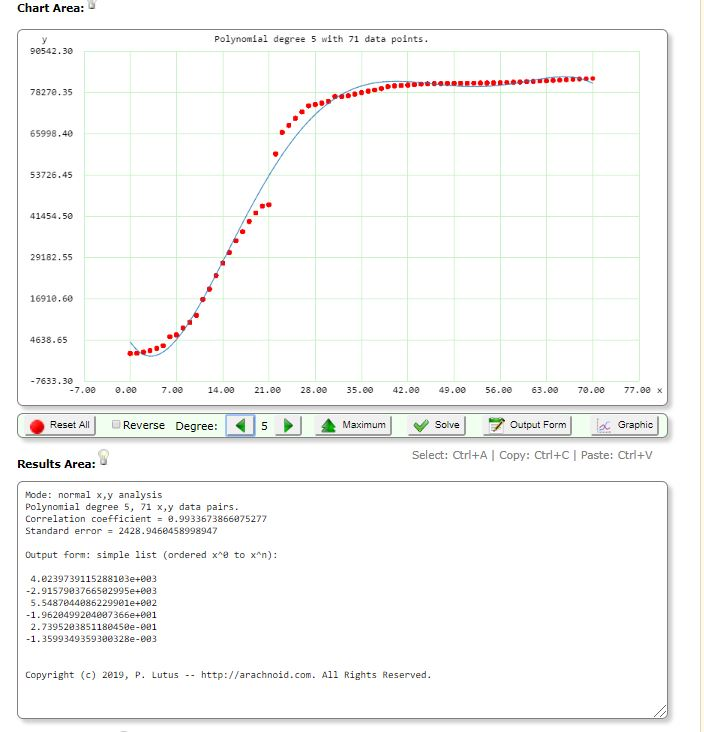

### Also I used Microsoft Excel to find the final polynomial equation for COVID-19 confirmed data for specific country, here are the steps in case you want to play around:
* Export the country specific confirmed cases data in .csv format (essentially x,y points)
* Select scatter chart from Microsoft Excel
* Select "Add Chart Element" from top-left toolbar button and then select Trendline-More Trendline Options
* Select polynomial and try to fit the trend line with change in polynomial degree (in my case i already knew polynomial degree above)
* Select "display equation on chart" and "display r-squared values", you will get the final polynomail equation and r-square value

## Curve Fitting : Polynomial Modelling : World

In [ ]:
# To find the Polynomial degree and Polynomial equation on the confirmed COVID-19 data you can use the following example
# to export the data into csv and use the steps mentioned above

# export "world" data
export_to_csv("World",world_confirmed_data)
export_to_csv("China",china_confirmed_data)
export_to_csv("Iran",iran_confirmed_data)
export_to_csv("Italy",italy_confirmed_data)
export_to_csv("Spain",spain_confirmed_data)
export_to_csv("USA",united_states_confirmed_data)
export_to_csv("India",india_confirmed_data)
export_to_csv("Germany",germany_confirmed_data)
export_to_csv("UK",uk_confirmed_data)
export_to_csv("France",france_confirmed_data)


## Polynomial Equation : India
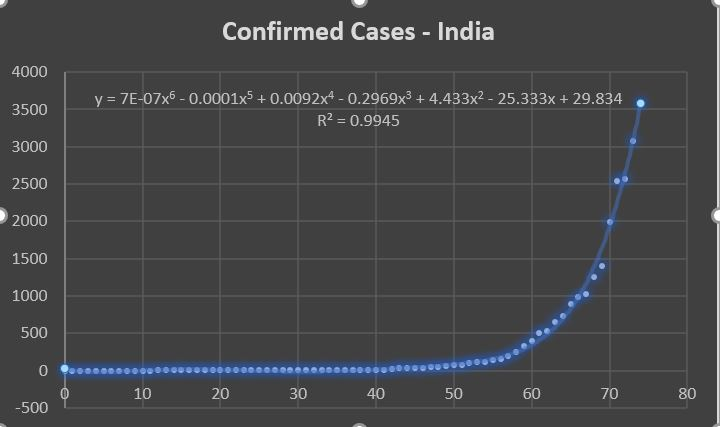

## Polynomial Equation : USA
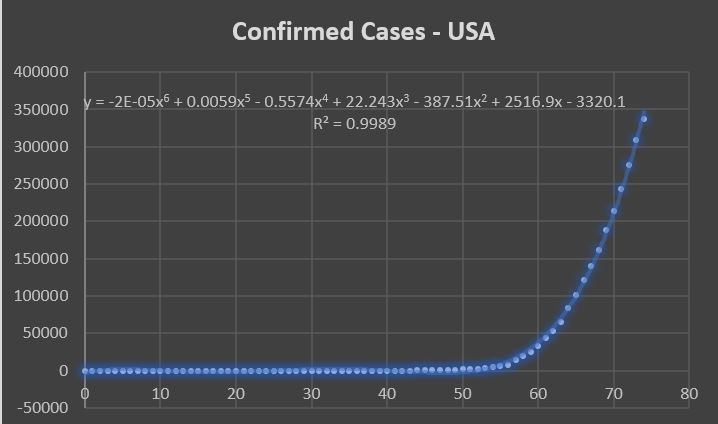

## Polynomial Equation : World
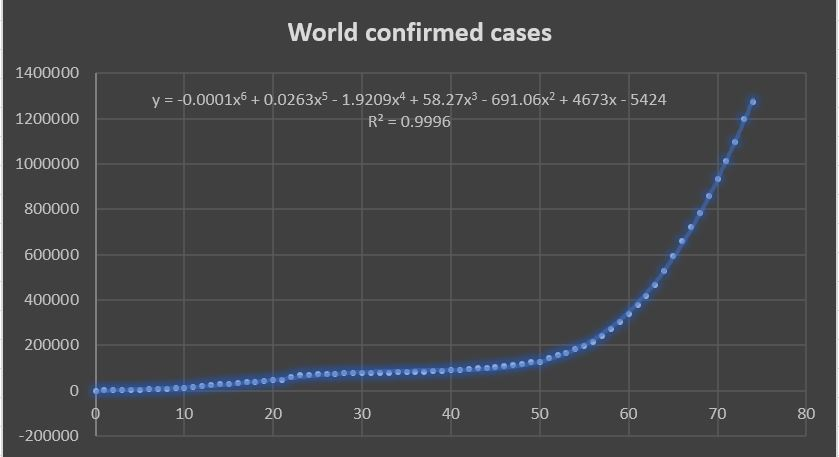

<div class="identifier">
<font color='blue'>
<b>Inference from above plots from Microsoft EXCEL</b>
<ul>
    <li>Note : Please draw the chart of country of interest, based on the method explained above.</li>
    <li>The polynomial degree of 6 is pretty good fit(with my earlier experiment degree of 5 was okay, hence we are still in dangerous zone) on the confirmed data</li>
    <li>R-Squared value is extremely decent and the trend line on the confirmed data fits very well for all the countries and world.</li>
    <li>Polynomial Equations for world and individual countries are drawn in the chart iteslf.</li>
</ul>
</font>
</div>

### Model fitting with the Python:

In [ ]:
# World
polynomial_model_confirmed_Cases(world_confirmed_data,"World",6)

In [ ]:
# China
polynomial_model_confirmed_Cases(china_confirmed_data,"China",6)

In [ ]:
# India
polynomial_model_confirmed_Cases(india_confirmed_data,"India",6)

In [ ]:
# United States of America
polynomial_model_confirmed_Cases(united_states_confirmed_data,"United States of America",6)

In [ ]:
# Italy
polynomial_model_confirmed_Cases(italy_confirmed_data,"Italy",6)

In [ ]:
# Spain
polynomial_model_confirmed_Cases(spain_confirmed_data,"Spain",6)

In [ ]:
# Germany
polynomial_model_confirmed_Cases(germany_confirmed_data,"Germany",6)

In [ ]:
# Iran
polynomial_model_confirmed_Cases(iran_confirmed_data,"Iran",6)

In [ ]:
# UK
polynomial_model_confirmed_Cases(uk_confirmed_data,"UK",6)

In [ ]:
# France
polynomial_model_confirmed_Cases(france_confirmed_data,"France",6)

<div class="identifier">
<font color='blue'>
<b>Inference from above plots from Trend data</b>
<ul>
    <li>India has sharp rise in last couple of days, trend line does not look promising.</li>
    <li>United States of America also have not seen the peak yet.</li>
    <li>China is moving towards COVAI-19 free nation. almost!!!.</li>
</ul>
</font>
</div>

## Mortality Analysis:

In [ ]:
all_list = []
all_list.append(world_mortality_data)
all_list.append(china_mortality_data)
all_list.append(italy_mortality_data)
all_list.append(iran_mortality_data)
all_list.append(spain_mortality_data)
all_list.append(united_states_mortality_data)
all_list.append(india_mortality_data)
all_list.append(germany_mortality_data)
all_list.append(uk_mortality_data)
all_list.append(france_mortality_data)

all_countries = []
all_countries.append("World")
all_countries.append("China")
all_countries.append("Italy")
all_countries.append("Iran")
all_countries.append("Spain")
all_countries.append("United States")
all_countries.append("India")
all_countries.append("Germany")
all_countries.append("United Kingdom")
all_countries.append("France")

plot_mortality_cases_data(all_list,all_countries)

<div class="identifier">
<font color='blue'>
<b>Inference from above plots from Trend data</b>
<ul>
    <li>With Indian contextual data, sharp rise in Mortality in India in last few days.</li>
    <li>China mortality rate is constant now, good sign towards full recovery.</li>
    <li>Rate of mortality in United States is also in steep rise.</li>
</ul>
</font>
</div>

# Conclusion
* China is definitely moving towards almost full recovery.
* Worrying sign for United States of America as the forecast trend shows (both in terms of confirmed cases and mortalities).
* Cases in India has suddenly spiked (Both Confirmed and Death cases).
* Spain and Italy saw a massive problem, still the problem is there, probably the peak is going down.
* In Germany COVID-19 positive cases are forecaseted to go down now, which is pretty good sign for the country.
* Confirmed COVID-19 Data from Iran tends towards positive direction.
* After looking at most countries data, the growth of COVID-19 positive cases is exponential, and thats worrying sign, the curve needs to be flatten out.
* Situation in United Kingdoma and France is still worrysome.
* SOCIAL DISTANCING IS MUST, thats the best remedy currently.